In [66]:
import requests
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
import datetime as dt
import pytz

import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

In [67]:
# locked with onecall
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
city = 'paris'
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
current = requests.get(base_url).json()
lat = current['coord']['lat']
lon = current['coord']['lon']

In [68]:
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
try:
    onecall_data = requests.get(base_url).json()
except:
    exit()

In [69]:
onecall_data

{'lat': 48.8534,
 'lon': 2.3488,
 'timezone': 'Europe/Paris',
 'timezone_offset': 7200,
 'current': {'dt': 1714716477,
  'sunrise': 1714710374,
  'sunset': 1714763312,
  'temp': 9.25,
  'feels_like': 7.28,
  'pressure': 1013,
  'humidity': 89,
  'dew_point': 7.53,
  'uvi': 0.31,
  'clouds': 20,
  'visibility': 10000,
  'wind_speed': 3.6,
  'wind_deg': 220,
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}]},
 'daily': [{'dt': 1714734000,
   'sunrise': 1714710374,
   'sunset': 1714763312,
   'moonrise': 1714703880,
   'moonset': 1714741680,
   'moon_phase': 0.82,
   'temp': {'day': 15.88,
    'min': 9.17,
    'max': 16.57,
    'night': 11.74,
    'eve': 15.7,
    'morn': 9.24},
   'feels_like': {'day': 14.72, 'night': 11.06, 'eve': 14.66, 'morn': 7.31},
   'pressure': 1013,
   'humidity': 46,
   'dew_point': 4.18,
   'wind_speed': 4.8,
   'wind_deg': 230,
   'wind_gust': 11.29,
   'weather': [{'id': 803,
     'main': 'Clouds',
     'desc

In [70]:
def human_date(d):
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S') 

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

In [71]:
df = onecall_data['daily']
current = onecall_data['current']
day1 = df[0]
day1


{'dt': 1714734000,
 'sunrise': 1714710374,
 'sunset': 1714763312,
 'moonrise': 1714703880,
 'moonset': 1714741680,
 'moon_phase': 0.82,
 'temp': {'day': 15.88,
  'min': 9.17,
  'max': 16.57,
  'night': 11.74,
  'eve': 15.7,
  'morn': 9.24},
 'feels_like': {'day': 14.72, 'night': 11.06, 'eve': 14.66, 'morn': 7.31},
 'pressure': 1013,
 'humidity': 46,
 'dew_point': 4.18,
 'wind_speed': 4.8,
 'wind_deg': 230,
 'wind_gust': 11.29,
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'clouds': 56,
 'pop': 0,
 'uvi': 5.2}

In [72]:
current

{'dt': 1714716477,
 'sunrise': 1714710374,
 'sunset': 1714763312,
 'temp': 9.25,
 'feels_like': 7.28,
 'pressure': 1013,
 'humidity': 89,
 'dew_point': 7.53,
 'uvi': 0.31,
 'clouds': 20,
 'visibility': 10000,
 'wind_speed': 3.6,
 'wind_deg': 220,
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}]}

In [73]:
import json
print(json.dumps(day1, indent=4))

{
    "dt": 1714734000,
    "sunrise": 1714710374,
    "sunset": 1714763312,
    "moonrise": 1714703880,
    "moonset": 1714741680,
    "moon_phase": 0.82,
    "temp": {
        "day": 15.88,
        "min": 9.17,
        "max": 16.57,
        "night": 11.74,
        "eve": 15.7,
        "morn": 9.24
    },
    "feels_like": {
        "day": 14.72,
        "night": 11.06,
        "eve": 14.66,
        "morn": 7.31
    },
    "pressure": 1013,
    "humidity": 46,
    "dew_point": 4.18,
    "wind_speed": 4.8,
    "wind_deg": 230,
    "wind_gust": 11.29,
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "clouds": 56,
    "pop": 0,
    "uvi": 5.2
}


In [74]:
# Serializing json
json_object = json.dumps(day1, indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [75]:
# get data from list of dicts
_8days = pd.DataFrame.from_records(df)
_8days.loc[0]

dt                                                   1714734000
sunrise                                              1714710374
sunset                                               1714763312
moonrise                                             1714703880
moonset                                              1714741680
moon_phase                                                 0.82
temp          {'day': 15.88, 'min': 9.17, 'max': 16.57, 'nig...
feels_like    {'day': 14.72, 'night': 11.06, 'eve': 14.66, '...
pressure                                                   1013
humidity                                                     46
dew_point                                                  4.18
wind_speed                                                  4.8
wind_deg                                                    230
wind_gust                                                 11.29
weather       [{'id': 803, 'main': 'Clouds', 'description': ...
clouds                                  

In [76]:
_8days.loc[0].temp.keys()

dict_keys(['day', 'min', 'max', 'night', 'eve', 'morn'])

In [77]:
_8days.loc[0].feels_like.keys()

dict_keys(['day', 'night', 'eve', 'morn'])

In [78]:
# weather is a list of dictionaries
_8days.loc[0].weather[0]

{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}

In [79]:
for key in _8days.loc[0].weather[0].keys():
    _8days[key]=_8days.loc[0].weather[0][key]
for key in _8days.loc[0].temp.keys():
    _8days[key]=_8days.loc[0].temp[key]
for key in _8days.loc[0].feels_like.keys():
    key2 = "fl_"+key
    #print(type(key))
    _8days[key2]=_8days.loc[0].feels_like[key]

In [80]:
_8days.loc[0]

dt                                                    1714734000
sunrise                                               1714710374
sunset                                                1714763312
moonrise                                              1714703880
moonset                                               1714741680
moon_phase                                                  0.82
temp           {'day': 15.88, 'min': 9.17, 'max': 16.57, 'nig...
feels_like     {'day': 14.72, 'night': 11.06, 'eve': 14.66, '...
pressure                                                    1013
humidity                                                      46
dew_point                                                   4.18
wind_speed                                                   4.8
wind_deg                                                     230
wind_gust                                                  11.29
weather        [{'id': 803, 'main': 'Clouds', 'description': ...
clouds                   

In [81]:
_8days = _8days.drop(['temp','feels_like','weather'],axis=1)
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           8 non-null      int64  
 1   sunrise      8 non-null      int64  
 2   sunset       8 non-null      int64  
 3   moonrise     8 non-null      int64  
 4   moonset      8 non-null      int64  
 5   moon_phase   8 non-null      float64
 6   pressure     8 non-null      int64  
 7   humidity     8 non-null      int64  
 8   dew_point    8 non-null      float64
 9   wind_speed   8 non-null      float64
 10  wind_deg     8 non-null      int64  
 11  wind_gust    8 non-null      float64
 12  clouds       8 non-null      int64  
 13  pop          8 non-null      float64
 14  uvi          8 non-null      float64
 15  rain         4 non-null      float64
 16  id           8 non-null      int64  
 17  main         8 non-null      object 
 18  description  8 non-null      object 
 19  icon        

In [82]:
#__8days[['dt','sunrise','sunset']]= pd.to_datetime(__8days[['dt','sunrise','sunset']], infer_datetime_format=True)
#df['dt'].apply(lambda x: x.date())
#__8days['dt'] = __8days['dt'].apply(lambda x: x.datetime64())

In [83]:
_8days['depression']=_8days['day']-_8days['dew_point']

In [84]:
_8days.keys()

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
       'pressure', 'humidity', 'dew_point', 'wind_speed', 'wind_deg',
       'wind_gust', 'clouds', 'pop', 'uvi', 'rain', 'id', 'main',
       'description', 'icon', 'day', 'min', 'max', 'night', 'eve', 'morn',
       'fl_day', 'fl_night', 'fl_eve', 'fl_morn', 'depression'],
      dtype='object')

In [85]:
_8days.loc[0]

dt                1714734000
sunrise           1714710374
sunset            1714763312
moonrise          1714703880
moonset           1714741680
moon_phase              0.82
pressure                1013
humidity                  46
dew_point               4.18
wind_speed               4.8
wind_deg                 230
wind_gust              11.29
clouds                    56
pop                      0.0
uvi                      5.2
rain                     NaN
id                       803
main                  Clouds
description    broken clouds
icon                     04d
day                    15.88
min                     9.17
max                    16.57
night                  11.74
eve                     15.7
morn                    9.24
fl_day                 14.72
fl_night               11.06
fl_eve                 14.66
fl_morn                 7.31
depression              11.7
Name: 0, dtype: object

In [86]:
# columns with dates
_8days.keys()[:5]

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset'], dtype='object')

In [87]:
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)

# Other way to select columns

In [88]:
df

[{'dt': 1714734000,
  'sunrise': 1714710374,
  'sunset': 1714763312,
  'moonrise': 1714703880,
  'moonset': 1714741680,
  'moon_phase': 0.82,
  'temp': {'day': 15.88,
   'min': 9.17,
   'max': 16.57,
   'night': 11.74,
   'eve': 15.7,
   'morn': 9.24},
  'feels_like': {'day': 14.72, 'night': 11.06, 'eve': 14.66, 'morn': 7.31},
  'pressure': 1013,
  'humidity': 46,
  'dew_point': 4.18,
  'wind_speed': 4.8,
  'wind_deg': 230,
  'wind_gust': 11.29,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'clouds': 56,
  'pop': 0,
  'uvi': 5.2},
 {'dt': 1714820400,
  'sunrise': 1714796677,
  'sunset': 1714849800,
  'moonrise': 1714791300,
  'moonset': 1714833120,
  'moon_phase': 0.86,
  'temp': {'day': 14.84,
   'min': 8.92,
   'max': 15.71,
   'night': 11.65,
   'eve': 13.91,
   'morn': 8.93},
  'feels_like': {'day': 13.82, 'night': 10.99, 'eve': 12.92, 'morn': 8.01},
  'pressure': 1013,
  'humidity': 55,
  'dew_point': 5.75,
  'wind_speed

In [89]:
_8days = pd.DataFrame.from_records(df)
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:19]
focus
focus_idx =_8days.keys()[focus]
focus_idx
status2 = pd.DataFrame(_8days[focus_idx])
status2

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,pop,uvi,rain
0,1714734000,1714710374,1714763312,1714703880,1714741680,0.82,1013,46,4.18,4.80,230,11.29,0.00,5.20,NaN
1,1714820400,1714796677,1714849800,1714791300,1714833120,0.86,1013,55,5.75,4.69,170,7.09,1.00,5.04,1.76
2,1714906800,1714882981,1714936287,1714878660,1714924680,0.90,1010,96,11.83,3.96,212,9.10,1.00,4.56,7.36
3,1714993200,1714969287,1715022774,1714966020,1715016240,0.93,1007,84,8.72,4.97,300,9.05,1.00,4.46,1.59
4,1715079600,1715055594,1715109261,1715053500,1715107860,0.97,1019,62,7.99,3.42,294,9.80,0.84,5.10,0.91
5,1715166000,1715141903,1715195747,1715141220,1715199540,0.00,1024,45,6.00,4.71,0,9.11,0.00,6.00,NaN
6,1715252400,1715228214,1715282232,1715229360,1715290920,0.05,1024,48,6.29,3.92,67,9.41,0.00,6.00,NaN
7,1715338800,1715314526,1715368717,1715318160,0,0.08,1019,45,7.55,4.31,87,9.44,0.00,6.00,NaN


In [90]:
_8days[["dt", "sunrise", "sunset"]]

,dt,sunrise,sunset
0,1714734000,1714710374,1714763312
1,1714820400,1714796677,1714849800
2,1714906800,1714882981,1714936287
3,1714993200,1714969287,1715022774
4,1715079600,1715055594,1715109261
5,1715166000,1715141903,1715195747
6,1715252400,1715228214,1715282232
7,1715338800,1715314526,1715368717


In [91]:
# convert int64 to 
_8days['dt'] = _8days['dt'].apply(pd.Timestamp.fromtimestamp)
_8days['sunrise'] = _8days['sunrise'].apply(pd.Timestamp.fromtimestamp)
_8days['sunset'] = _8days['sunset'].apply(pd.Timestamp.fromtimestamp)
_8days['moonrise'] = _8days['moonrise'].apply(pd.Timestamp.fromtimestamp)
_8days['moonset'] = _8days['moonset'].apply(pd.Timestamp.fromtimestamp)
_8days[['dt','sunrise','sunset','moonrise','moonset']]


,dt,sunrise,sunset,moonrise,moonset
0,2024-05-03 13:00:00,2024-05-03 06:26:14,2024-05-03 21:08:32,2024-05-03 04:38:00,2024-05-03 15:08:00
1,2024-05-04 13:00:00,2024-05-04 06:24:37,2024-05-04 21:10:00,2024-05-04 04:55:00,2024-05-04 16:32:00
2,2024-05-05 13:00:00,2024-05-05 06:23:01,2024-05-05 21:11:27,2024-05-05 05:11:00,2024-05-05 17:58:00
3,2024-05-06 13:00:00,2024-05-06 06:21:27,2024-05-06 21:12:54,2024-05-06 05:27:00,2024-05-06 19:24:00
4,2024-05-07 13:00:00,2024-05-07 06:19:54,2024-05-07 21:14:21,2024-05-07 05:45:00,2024-05-07 20:51:00
5,2024-05-08 13:00:00,2024-05-08 06:18:23,2024-05-08 21:15:47,2024-05-08 06:07:00,2024-05-08 22:19:00
6,2024-05-09 13:00:00,2024-05-09 06:16:54,2024-05-09 21:17:12,2024-05-09 06:36:00,2024-05-09 23:42:00
7,2024-05-10 13:00:00,2024-05-10 06:15:26,2024-05-10 21:18:37,2024-05-10 07:16:00,1970-01-01 01:00:00


In [92]:
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dt          8 non-null      datetime64[ns]
 1   sunrise     8 non-null      datetime64[ns]
 2   sunset      8 non-null      datetime64[ns]
 3   moonrise    8 non-null      datetime64[ns]
 4   moonset     8 non-null      datetime64[ns]
 5   moon_phase  8 non-null      float64       
 6   temp        8 non-null      object        
 7   feels_like  8 non-null      object        
 8   pressure    8 non-null      int64         
 9   humidity    8 non-null      int64         
 10  dew_point   8 non-null      float64       
 11  wind_speed  8 non-null      float64       
 12  wind_deg    8 non-null      int64         
 13  wind_gust   8 non-null      float64       
 14  weather     8 non-null      object        
 15  clouds      8 non-null      int64         
 16  pop         8 non-null      fl

In [93]:
# Create DataFrame
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
df = DataFrame.from_dict(
      {'Courses':["Spark","Hadoop","pandas"],
     'Fee' :[20000,25000,30000],
     'Duration':['30days','40days','35days'],
     'Discount':[1000,2500,1500],
     'Inserted': ["10/02/2021, 10:39:24","09/12/2021, 08:09:24","01/22/2021, 10:29:14"],
     'Updated':  ["11/12/2021, 11:39:24","10/22/2021, 10:39:34","05/12/2021, 04:49:04"]},
    orient='index', 
    columns=['A', 'B', 'C']).T
df
df.info()
# Use DataFrame.apply() to convert multiple columns to datetime
df[['Inserted','Updated']] = df[['Inserted','Updated']].apply(pd.to_datetime)
print(" After converting multiple columns to datetime:\n", df)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Courses   3 non-null      object
 1   Fee       3 non-null      object
 2   Duration  3 non-null      object
 3   Discount  3 non-null      object
 4   Inserted  3 non-null      object
 5   Updated   3 non-null      object
dtypes: object(6)
memory usage: 168.0+ bytes
 After converting multiple columns to datetime:
   Courses    Fee Duration Discount            Inserted             Updated
A   Spark  20000   30days     1000 2021-10-02 10:39:24 2021-11-12 11:39:24
B  Hadoop  25000   40days     2500 2021-09-12 08:09:24 2021-10-22 10:39:34
C  pandas  30000   35days     1500 2021-01-22 10:29:14 2021-05-12 04:49:04


In [94]:
for k in status2.keys()[:5]:
    #print(k)
    if k=='dt':
        status2[k] = status2[k].apply(get_date)
    else:
        status2[k] = status2[k].apply(get_time)

In [95]:
week = status2.T
week

,0,1,2,3,4,5,6,7
dt,03/05/2024,04/05/2024,05/05/2024,06/05/2024,07/05/2024,08/05/2024,09/05/2024,10/05/2024
sunrise,06:26:14,06:24:37,06:23:01,06:21:27,06:19:54,06:18:23,06:16:54,06:15:26
sunset,21:08:32,21:10:00,21:11:27,21:12:54,21:14:21,21:15:47,21:17:12,21:18:37
moonrise,04:38:00,04:55:00,05:11:00,05:27:00,05:45:00,06:07:00,06:36:00,07:16:00
moonset,15:08:00,16:32:00,17:58:00,19:24:00,20:51:00,22:19:00,23:42:00,01:00:00
moon_phase,0.82,0.86,0.9,0.93,0.97,0.0,0.05,0.08
pressure,1013,1013,1010,1007,1019,1024,1024,1019
humidity,46,55,96,84,62,45,48,45
dew_point,4.18,5.75,11.83,8.72,7.99,6.0,6.29,7.55
wind_speed,4.8,4.69,3.96,4.97,3.42,4.71,3.92,4.31


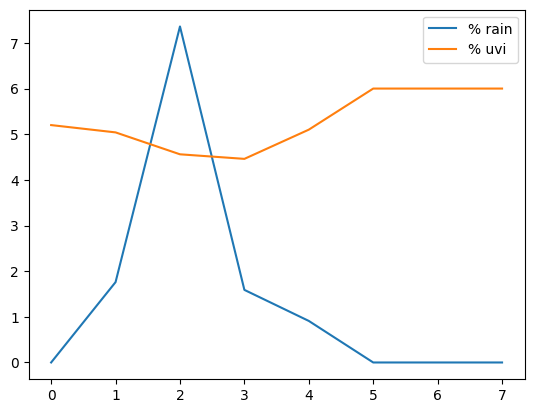

In [96]:
# pd.set_option('future.no_silent_downcasting', True)
week.fillna(0)
week.loc['rain'].fillna(0).plot(label='% rain')
week.loc['uvi'].fillna(0).plot(label='% uvi')
plt.legend()

In [97]:
week.to_csv('week.csv')

In [98]:
status2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          8 non-null      object 
 1   sunrise     8 non-null      object 
 2   sunset      8 non-null      object 
 3   moonrise    8 non-null      object 
 4   moonset     8 non-null      object 
 5   moon_phase  8 non-null      float64
 6   pressure    8 non-null      int64  
 7   humidity    8 non-null      int64  
 8   dew_point   8 non-null      float64
 9   wind_speed  8 non-null      float64
 10  wind_deg    8 non-null      int64  
 11  wind_gust   8 non-null      float64
 12  pop         8 non-null      float64
 13  uvi         8 non-null      float64
 14  rain        4 non-null      float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.1+ KB


In [99]:
demain = status2.loc[1]  # demain
demain

dt            04/05/2024
sunrise         06:24:37
sunset          21:10:00
moonrise        04:55:00
moonset         16:32:00
moon_phase          0.86
pressure            1013
humidity              55
dew_point           5.75
wind_speed          4.69
wind_deg             170
wind_gust           7.09
pop                  1.0
uvi                 5.04
rain                1.76
Name: 1, dtype: object

In [100]:
# zip
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv') 

# Formule de Heinrich Gustav Magnus-Tetens
### https://fr.wikipedia.org/wiki/Point_de_ros%C3%A9e


In [101]:

'''Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre
'''
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    dewpoint = b*f/(a-f)
    depression = T-dewpoint
    return dewpoint,depression #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


In [102]:
current

{'dt': 1714716477,
 'sunrise': 1714710374,
 'sunset': 1714763312,
 'temp': 9.25,
 'feels_like': 7.28,
 'pressure': 1013,
 'humidity': 89,
 'dew_point': 7.53,
 'uvi': 0.31,
 'clouds': 20,
 'visibility': 10000,
 'wind_speed': 3.6,
 'wind_deg': 220,
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}]}

In [103]:
T = current['temp']
phi = current['humidity']/100
dewpoint(T, phi), current['dew_point']

((7.530846807844505, 1.7191531921554946), 7.53)

T: 9.25, Hum: 0.89
Dewpoint: 7.530846807844505
Depression:  1.72


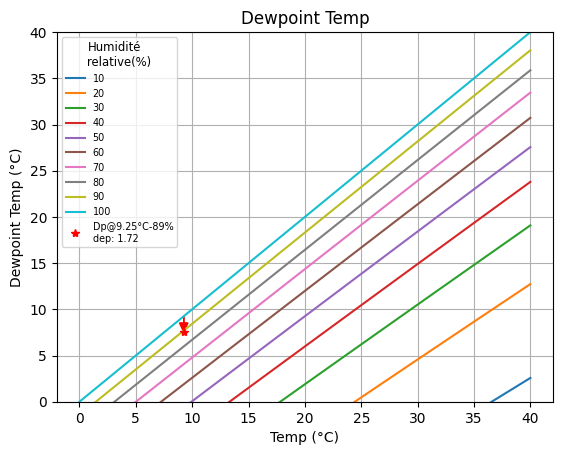

In [104]:
# dewpoint
x = np.linspace(0,40,10)
for hum in np.linspace(0.1,1.,10):
    y = dewpoint(x,hum)[0]
    #x,y
    plt.plot(x,y,label=f'{hum*100:.0f}')
    #plt.legend(fontsize='small',title_fontsize='small')
plt.grid()


hum = current['humidity']/100
T = current['temp']
dp = dewpoint(T,hum)[0]  # dewpoint at current T,hum 
depression = dewpoint(T,hum)[1]  # dew depression at current T,hum
saturation = dewpoint(T,1)[0]  # dewpoint @ T for humidity=100% = T
# show '*' for dewpoint present temp,hum
plt.plot(T,dewpoint(T,hum)[0],'r*',label=f'Dp@{T}°C-{int(hum*100)}%\ndep:{depression:5.2f}')
# show arrow for dewpoint depression = T-Tr at current temp,hum
# arrow (x,y,dx,dy)
plt.arrow(T,T,0,-T+dp,shape='full',head_width = 0.75,head_starts_at_zero=False, length_includes_head=True,fc='red',ec='red',head_length=1)
plt.legend(title='Humidité\nrelative(%)',loc=2,fontsize='x-small',title_fontsize='small')
plt.title('Dewpoint Temp')
plt.xlabel('Temp (°C)')
plt.ylabel('Dewpoint Temp (°C)')
plt.ylim(0,40)

print(f'T: {T}, Hum: {hum}\nDewpoint: {dp}\nDepression: {depression:5.2f}')

In [105]:
hum,saturation,T

(0.89, 9.25, 9.25)

(9.25, 0.89, 9.25, 7.53, 1.72, 'pluie')

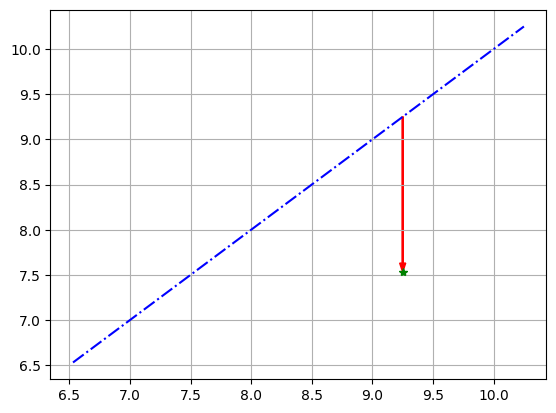

In [106]:
plt.plot(T,dp,'*',c='green')
plt.plot((dp-1,saturation+1),(dp-1,saturation+1),'b-.')
plt.grid()
plt.arrow(T,T,0,-(T-dp),shape='full',width=0.01,head_width = 0.05,head_starts_at_zero=False, length_includes_head=True,fc='red',ec='red',head_length=0.1)

# saturation : humidity=100%
depression= T-dp
T,hum,saturation,round(dp,2),round(depression,2),'pluie' if T-dp<5 else 'beau temps'  #saturation = T

# Dew depression : T - Tr
Plus cette valeur est petite, plus l’humidité relative à cette altitude est grande et plus la présence de nuages est probable. 

Ainsi, une dépression de plus de 5 °C est en général associée avec l'absence de couche nuageuse et une valeur près de 0 °C est synonyme d'une couverture complète. 

(0.0, 40.0)

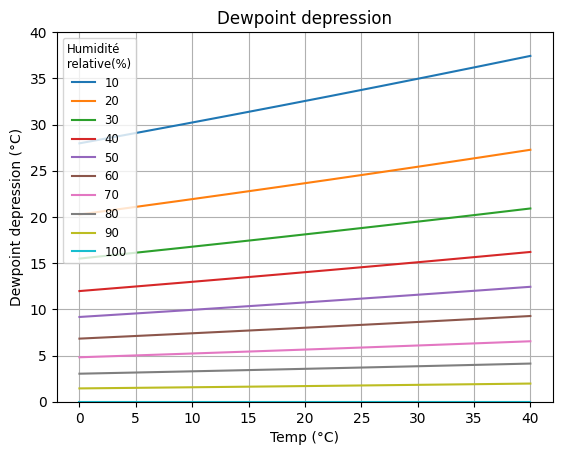

In [107]:
# dewpoint
x = np.linspace(0,40,10)
for hum in np.linspace(0.1,1.,10):
    y = dewpoint(x,hum)[1]
    #x,y
    plt.plot(x,y,label=f'{hum*100:.0f}')
    plt.legend(title='Humidité\nrelative(%)',loc=2,fontsize='small',title_fontsize='small')
plt.grid()
plt.title('Dewpoint depression')
plt.xlabel('Temp (°C)')
plt.ylabel('Dewpoint depression (°C)')
plt.ylim(0,40)

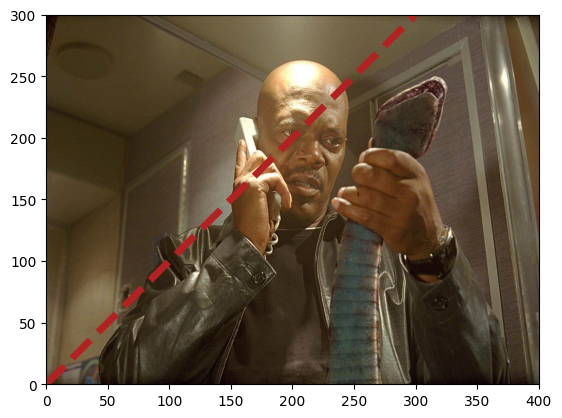

In [108]:

img = plt.imread("snakes-plane.jpg")    # don't work with svg files
fig, ax = plt.subplots()
x = range(300)
ax.imshow(img, extent=[0, 400, 0, 300])
ax.plot(x, x, '--', linewidth=5, color='firebrick')

![Dewpoint](Dewpoint-RH-fr.svg)

![Diagramme binaire Liquide Vapeur](Diagramme_binaire_liquide-vapeur.svg)

Le <b>gradient thermique adiabatique</b> est, dans l'atmosphère terrestre, la variation de température de l'air avec l'altitude, autrement dit le gradient de la température de l'air, qui ne dépend que de la pression atmosphérique, c'est-à-dire :

- sans considération d'échange de chaleur avec l'environnement (autres masses d'air, relief) ;<br>
- sans considération de condensation (formation de nuages) ni de précipitations.
![Rain_shadow_effect](Rain_Shadow_Effect_caused_by_Orographic_Lift.png)

Supposons un vent sec parallèle au sol qui rencontre un obstacle du relief (colline, montagne). L'air suit le relief et s'élève, il subit donc une détente qui le refroidit. Puis, lorsque l'air redescend sur l'autre versant, il se réchauffe. Si l'opération a été suffisamment rapide, l'air n'a pas échangé de chaleur avec l'obstacle ni avec l'air d'altitude, il se retrouve donc à la même température de l'autre côté.

Maintenant, si l'humidité de l'air est assez importante, l'eau va se condenser en montant. Deux scénarios peuvent se produire :

1. s'il ne pleut pas sur le côté face au vent, en redescendant, l'air se réchauffe et donc les gouttelettes d'eau s'évaporent à nouveau. La chaleur libérée par la liquéfaction en montant est réabsorbée par l'évaporation en descendant, l'air a donc également la même température de l'autre côté du versant ;<br><br>
2. s'il pleut au sommet de la montagne, cela change les conditions, l'air a perdu une partie de son humidité au sommet de la montagne. Il y a donc moins d'eau qui s'évapore et ainsi moins de chaleur absorbée : à altitude égale, l'air de l'autre côté du versant est donc plus chaud.

In [109]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO


html = requests.get("https://fr.wikipedia.org/wiki/Gradient_thermique_adiabatique").text.replace(',','.').replace('−','-').replace('- ','-')
html=StringIO(html)

In [110]:
cols= ["altitude(km)",	
"pression(hPa)",
"température(K)",	
"température(°C)",	
"dp(hPa)",	
"dp/p(sans unité)",	
"dT/T(sans unité)",	
"dT(K)"]

In [111]:
data = pd.read_html(html)
len(data), data


(4,
 [    altitude  (km)  pression  (hPa)  température  (K)  température (°C)  \
  0              0.0             1013            288.15             15.00   
  1              0.5              955            283.44             10.29   
  2              1.0              900            278.77              5.62   
  3              1.5              845            273.90              0.75   
  4              2.0              794            269.18             -3.97   
  5              2.5              746            264.53             -8.62   
  6              3.0              700            259.87            -13.28   
  7              3.5              658            255.42            -17.73   
  8              4.0              617            250.87            -22.80   
  9              5.0              541            242.04            -33.11   
  10             6.0              471            233.09            -42.06   
  11             7.0              411            224.61            -50.5

In [112]:
data[0]['température (°C)']

0     15.00
1     10.29
2      5.62
3      0.75
4     -3.97
5     -8.62
6    -13.28
7    -17.73
8    -22.80
9    -33.11
10   -42.06
11   -50.54
12   -56.97
13   -63.47
14   -75.53
15   -83.71
16   -91.66
Name: température (°C), dtype: float64

In [113]:
data[0].columns

Index(['altitude  (km)', 'pression  (hPa)', 'température  (K)',
       'température (°C)', '(hPa)', '(sans unité)', '(sans unité).1', '(K)'],
      dtype='object')

In [114]:
data[0].columns=cols
#data[0].set_axis(cols, axis="columns", inplace=True) 

In [115]:
model1 = data[0]
model1

,altitude(km),pression(hPa),température(K),température(°C),dp(hPa),dp/p(sans unité),dT/T(sans unité),dT(K)
0,0.0,1013,288.15,15.00,NaN,NaN,NaN,NaN
1,0.5,955,283.44,10.29,-58.0,-0.057,-0.016,-4.71
2,1.0,900,278.77,5.62,-55.0,-0.058,-0.016,-4.66
3,1.5,845,273.90,0.75,-55.0,-0.061,-0.017,-4.87
4,2.0,794,269.18,-3.97,-51.0,-0.060,-0.017,-4.72
5,2.5,746,264.53,-8.62,-48.0,-0.060,-0.017,-4.65
6,3.0,700,259.87,-13.28,-46.0,-0.062,-0.018,-4.66
7,3.5,658,255.42,-17.73,-42.0,-0.060,-0.017,-4.45
8,4.0,617,250.87,-22.80,-41.0,-0.062,-0.018,-4.55
9,5.0,541,242.04,-33.11,-76.0,-0.123,-0.035,-8.83


In [116]:
cols= ["altitude(km)",	
"pression(hPa)",
"température(K)",		
"dp(hPa)",	
"dp/p(sans unité)",	
"dT/T(sans unité)",	
"dT(K)"]

In [117]:
model2 = data[1]
model2.columns=cols
model2

,altitude(km),pression(hPa),température(K),dp(hPa),dp/p(sans unité),dT/T(sans unité),dT(K)
0,0.0,1013,288.15,NaN,NaN,NaN,NaN
1,0.5,955,282.15,-58.0,-0.057,-0.016,-4.71
2,1.0,900,280.15,-55.0,-0.058,-0.016,-4.64
3,1.5,845,278.15,-55.0,-0.061,-0.017,-4.89
4,2.0,794,275.15,-51.0,-0.060,-0.017,-4.80
5,2.5,746,272.15,-48.0,-0.060,-0.017,-4.75
6,3.0,700,270.15,-46.0,-0.062,-0.018,-4.79
7,3.5,658,267.15,-42.0,-0.060,-0.017,-4.63
8,4.0,617,263.15,-41.0,-0.062,-0.018,-4.76
9,5.0,541,257.15,-76.0,-0.123,-0.035,-9.26


In [118]:
data

[    altitude(km)  pression(hPa)  température(K)  température(°C)  dp(hPa)  \
 0            0.0           1013          288.15            15.00      NaN   
 1            0.5            955          283.44            10.29    -58.0   
 2            1.0            900          278.77             5.62    -55.0   
 3            1.5            845          273.90             0.75    -55.0   
 4            2.0            794          269.18            -3.97    -51.0   
 5            2.5            746          264.53            -8.62    -48.0   
 6            3.0            700          259.87           -13.28    -46.0   
 7            3.5            658          255.42           -17.73    -42.0   
 8            4.0            617          250.87           -22.80    -41.0   
 9            5.0            541          242.04           -33.11    -76.0   
 10           6.0            471          233.09           -42.06    -70.0   
 11           7.0            411          224.61           -50.5

In [119]:
#model1 = data[0]
#model2 = data[1]
gradient = data[2]
gradient


Altitude (km) Gradient thermique adiabatique (°C/km)           \
   Altitude (km)                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
   Gradient thermique du modèle OACI (°C/km)         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [120]:
level0 = gradient.columns.levels[0]
level1 = gradient.columns.levels[1]
level0, level1
# level1.columns (6 columns) is equivalent to : {0:level1[0], 1:level1[2], 2:level1[3], 3:level1[1], 4:level1[2], 5:level1[3]}

(Index(['Altitude (km)', 'Gradient thermique adiabatique (°C/km)',
        'Gradient thermique du modèle OACI (°C/km)', 'Température (°C)'],
       dtype='object'),
 Index(['Altitude (km)', 'Gradient thermique du modèle OACI (°C/km)',
        'modèle 1', 'modèle 2'],
       dtype='object'))

In [121]:
cols=[".","..","modèle 1","modèle 2"]

In [122]:
#rename level 1 (inplace=True) deprecated with set_levels()
gradient.columns = gradient.columns.set_levels(cols,level=1)

In [123]:
gradient

Altitude (km) Gradient thermique adiabatique (°C/km)           \
               .                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
                                          ..         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [124]:
keys=model1.keys()
keys

Index(['altitude(km)', 'pression(hPa)', 'température(K)', 'température(°C)',
       'dp(hPa)', 'dp/p(sans unité)', 'dT/T(sans unité)', 'dT(K)'],
      dtype='object')

In [125]:
altitude = model1[keys[0]]
pression = model1[keys[1]]
temperatureK = model1[keys[2]]
temperatureC = model1[keys[3]]


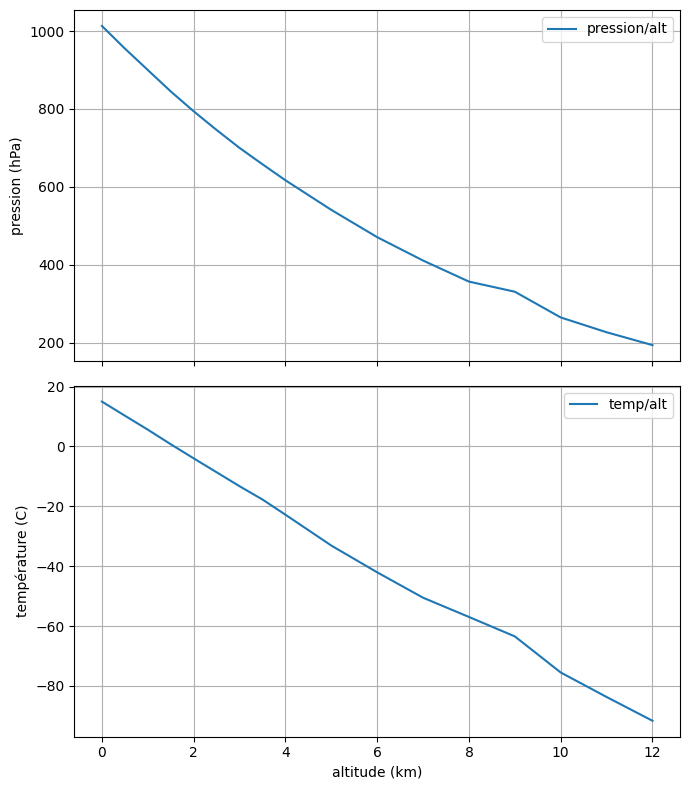

In [126]:
fig, (ax1,ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(7, 8)
ax1.plot(altitude, pression, label='pression/alt')
plt.xlabel('altitude (km)')
ax1.set_ylabel('pression (hPa)')
ax1.legend()
ax1.grid()
ax2.plot(altitude, temperatureC, label='temp/alt')
#ax2.xlabel('altitude (km)')
ax2.set_ylabel('température (C)')
ax2.legend()
ax2.grid()
fig.tight_layout()

In [127]:
gradient

Altitude (km) Gradient thermique adiabatique (°C/km)           \
               .                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
                                          ..         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [128]:
gradient.keys()

MultiIndex([(                            'Altitude (km)',        '.'),
            (   'Gradient thermique adiabatique (°C/km)', 'modèle 1'),
            (   'Gradient thermique adiabatique (°C/km)', 'modèle 2'),
            ('Gradient thermique du modèle OACI (°C/km)',       '..'),
            (                         'Température (°C)', 'modèle 1'),
            (                         'Température (°C)', 'modèle 2')],
           )

In [129]:
g_keys = gradient.keys()
g_alt = gradient[g_keys[0]]
g_model1 = gradient[g_keys[1]]
g_model2 = gradient[g_keys[2]]
#g_model1,g_model2

#gradient.info()

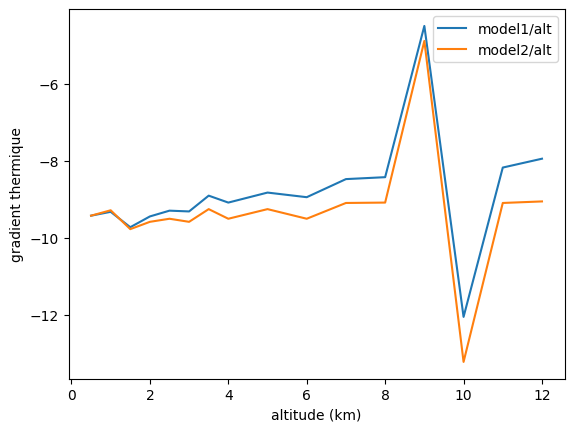

In [130]:
plt.plot(g_alt, g_model1, label='model1/alt')
plt.plot(g_alt, g_model2, label='model2/alt')
plt.xlabel('altitude (km)')
plt.ylabel('gradient thermique')
plt.legend()